In [1]:
pip install pandas matplotlib seaborn statsmodels

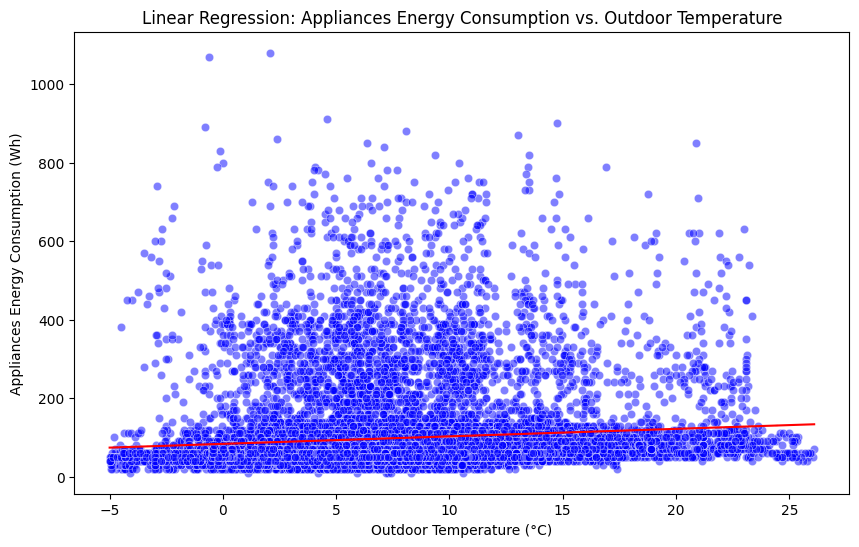

                            OLS Regression Results                            
Dep. Variable:             Appliances   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     195.9
Date:                Wed, 18 Sep 2024   Prob (F-statistic):           2.62e-44
Time:                        06:32:12   Log-Likelihood:            -1.1928e+05
No. Observations:               19735   AIC:                         2.386e+05
Df Residuals:                   19733   BIC:                         2.386e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.5253      1.246     67.043      0.0

In [ ]:
# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the dataset
data = pd.read_csv("/content/data_application_energy.csv")

# Perform linear regression of Appliances ~ T_out
X = data['T_out']
Y = data['Appliances']
X_with_const = sm.add_constant(X)  # Adding a constant for the intercept in the model
lm_model = sm.OLS(Y, X_with_const).fit()

# Create a scatter plot of Appliances vs. T_out with the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='T_out', y='Appliances', data=data, color='blue', alpha=0.5)

# Plot the regression line
sns.lineplot(x='T_out', y=lm_model.predict(X_with_const), data=data, color='red')

# Add titles and labels
plt.title("Linear Regression: Appliances Energy Consumption vs. Outdoor Temperature")
plt.xlabel("Outdoor Temperature (°C)")
plt.ylabel("Appliances Energy Consumption (Wh)")

# Show the plot
plt.show()

# Print the summary of the linear regression model
print(lm_model.summary())


In [5]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing, model_selection, metrics
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import DBSCAN
import plotly.express as px
import plotly.graph_objects as go
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.neighbors import LocalOutlierFactor
from tqdm import tqdm
from colorsys import yiq_to_rgb
from dataclasses import dataclass, field
import math
from pandas import read_csv
from tqdm import tqdm
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [6]:
df = pd.read_csv('/content/data_application_energy.csv')

In [7]:
# Downloading othe dataset
!wget -O energydata_complete.csv https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv

--2024-09-18 13:20:36--  https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘energydata_complete.csv’

energydata_complete     [      <=>           ]  11.42M  8.00MB/s    in 1.4s    

2024-09-18 13:20:38 (8.00 MB/s) - ‘energydata_complete.csv’ saved [11979363]



In [8]:
# Import data into dataframe
df = pd.read_csv('energydata_complete.csv')

In [9]:
pd.set_option('display.max_columns', None)  # Display all the columns
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [10]:
df.isnull().sum()

,0
date,0
Appliances,0
lights,0
T1,0
RH_1,0
T2,0
RH_2,0
T3,0
RH_3,0
T4,0


In [11]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [12]:
# This is not very relevant step - could be used to derive a new categorical variable called season based on the date then perform one-hot encoding to convert it into numerical feature for model training

# convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# extract the month, weekday, hour, and week columns
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.weekday
df['hour'] = df['date'].dt.hour
df['week'] = df['date'].dt.isocalendar().week
df['day_of_week'] = df['date'].dt.day_name()
df['week_of_month'] = (df['date'].dt.day-1) // 7 + 1
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,month,weekday,hour,week,day_of_week,week_of_month
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,1,0,17,2,Monday,2
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,1,0,17,2,Monday,2
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,1,0,17,2,Monday,2
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,1,0,17,2,Monday,2
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,1,0,17,2,Monday,2


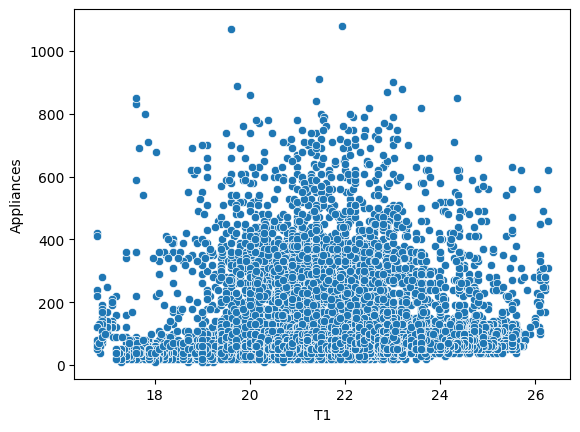

In [13]:
# Explore the relationship between features and target variable:
sns.scatterplot(x='T1', y='Appliances', data=df)
plt.show()

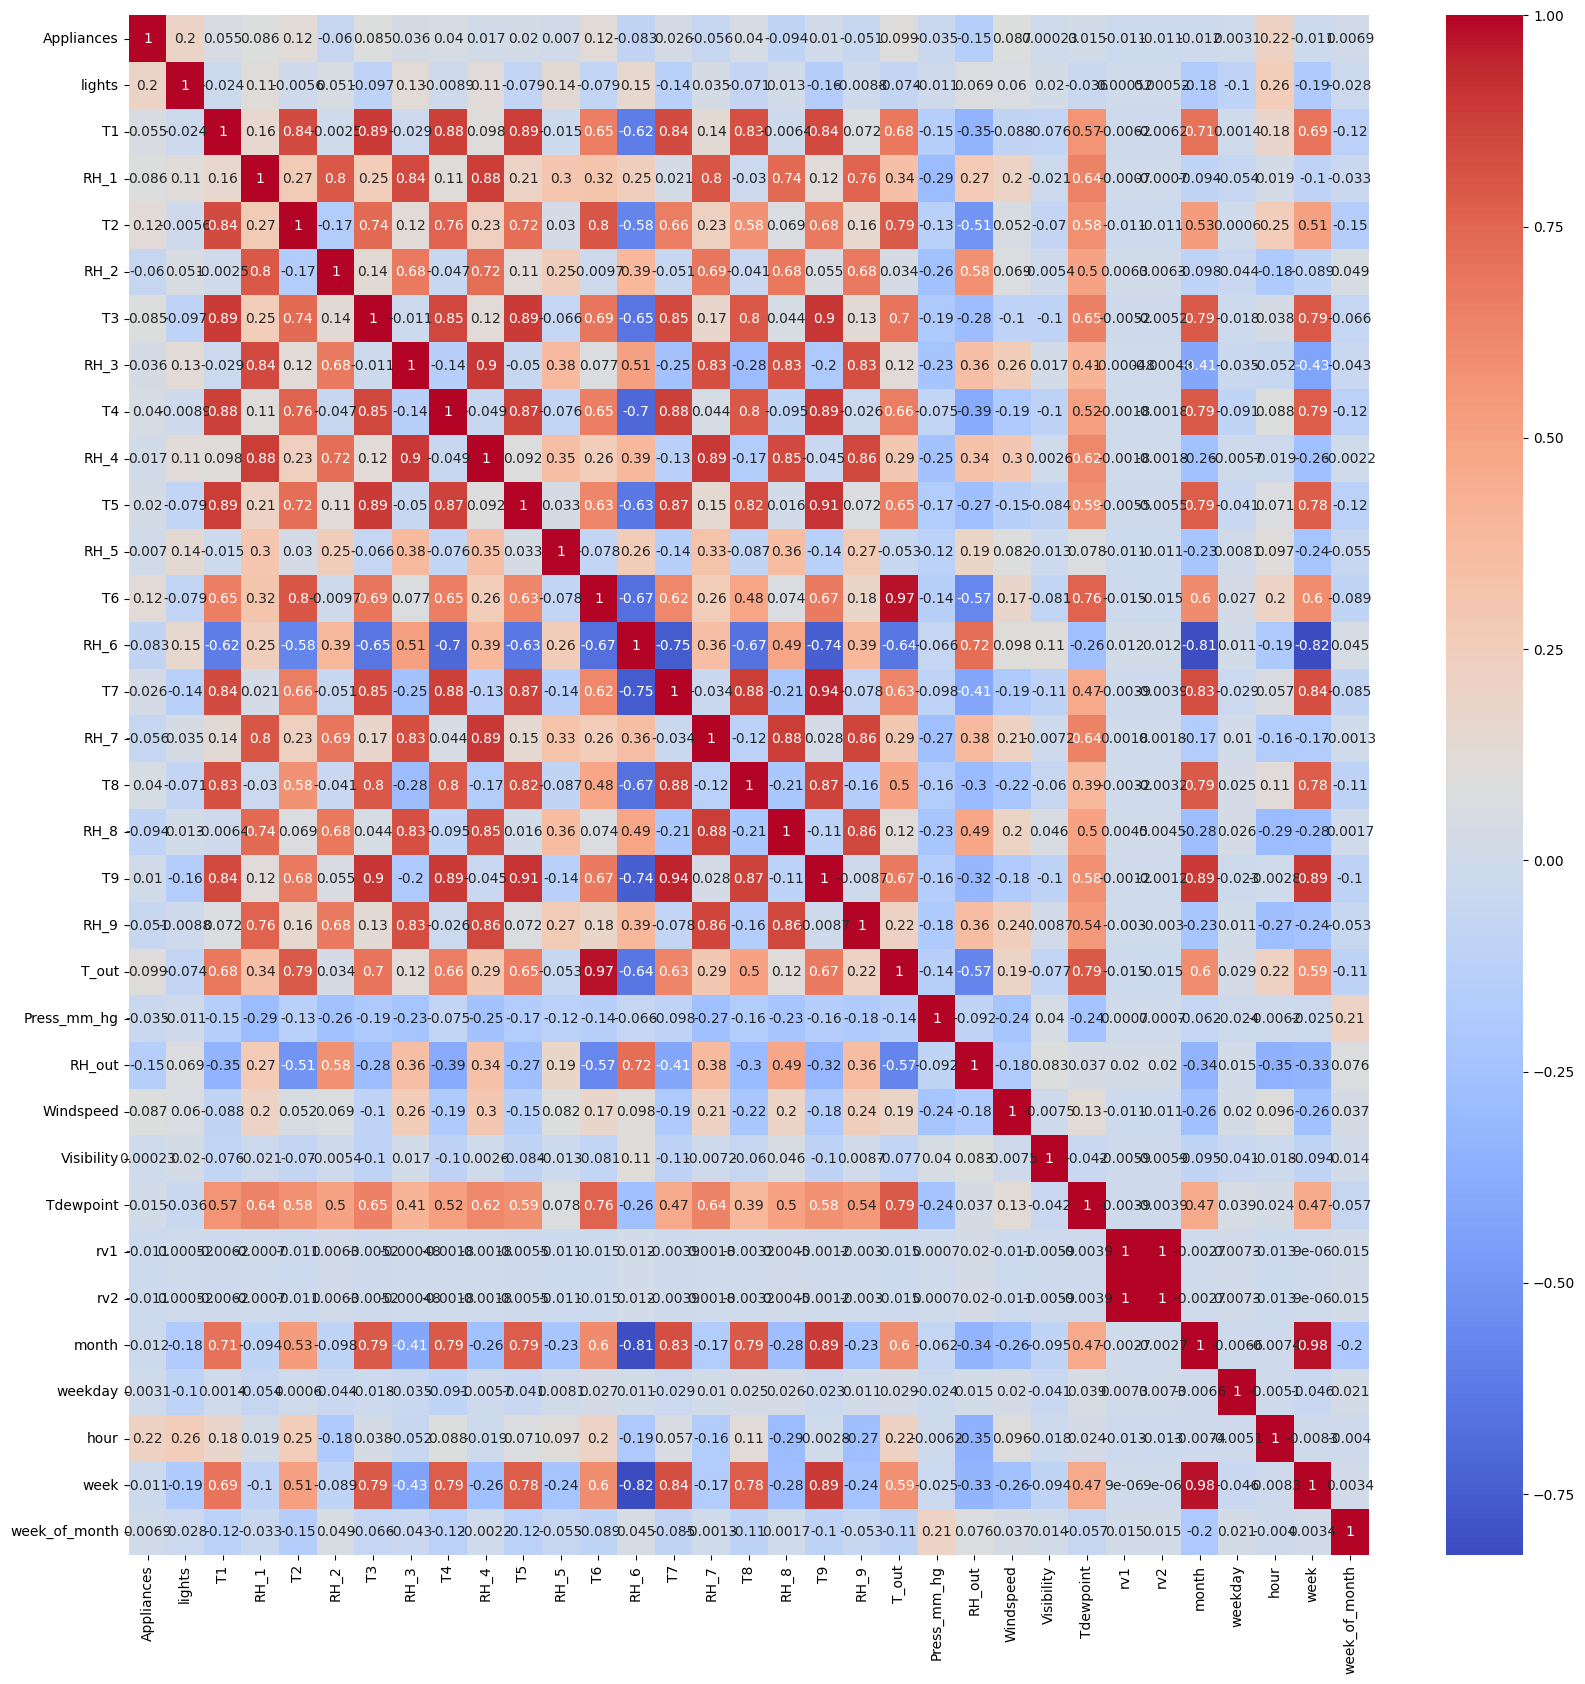

In [14]:
# Explore the relationship between features:

# compute the correlation matrix
#corr_matrix = df.corr()

# create the heatmap with a larger size
#plt.figure(figsize=(20, 20))
#sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# show the plot
#plt.show()

# compute the correlation matrix
corr_matrix = df.select_dtypes(include=np.number).corr()

# create the heatmap with a larger size
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# show the plot
plt.show()

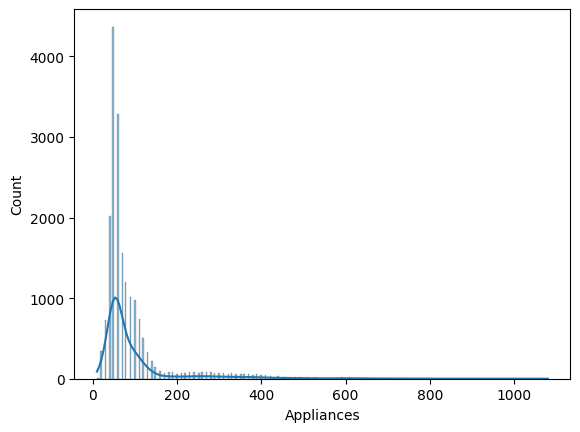

In [15]:
# Visualize the distribution of the target variable:
sns.histplot(df['Appliances'], kde=True)
plt.show()

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Extract the features to be checked for multicollinearity
X = df[['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]

# Calculate the VIF for each feature
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values
vif

,Features,VIF
0,Appliances,2.284702
1,lights,1.614563
2,T1,3606.384646
3,RH_1,1688.811559
4,T2,2519.584504
5,RH_2,2205.364940
6,T3,1276.028377
7,RH_3,1572.250962
8,T4,1027.802978
9,RH_4,1394.032518


In [17]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,month,weekday,hour,week,day_of_week,week_of_month
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,1,0,17,2,Monday,2
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,1,0,17,2,Monday,2
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,1,0,17,2,Monday,2
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,1,0,17,2,Monday,2
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,1,0,17,2,Monday,2


In [18]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'month', 'weekday', 'hour',
       'week', 'day_of_week', 'week_of_month'],
      dtype='object')

In [19]:
def remove_outliers_DBSCAN(df,eps,min_samples):
    outlier_detection = DBSCAN(eps=eps, min_samples= min_samples)
    clusters = outlier_detection.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    return data['cluster']

In [20]:
df_cluster_input = df[['Appliances']]
clusters = remove_outliers_DBSCAN(df_cluster_input,0.5,10)
clusters.value_counts().sort_values(ascending=False)

,count
cluster,
1,4368
0,3282
17,2019
2,1560
9,1205
...,...
4,11
58,11
59,11


In [21]:
df_cluster=pd.DataFrame(clusters)
ind_outlier=df_cluster.index[df_cluster['cluster']==-1]
ind_outlier

Index([  393,   431,   432,   443,   731,   732,   867,   868,  1031,  1079,
       ...
       15799, 15812, 15841, 16647, 17861, 18820, 18830, 19541, 19581, 19582],
      dtype='int64', length=120)

In [22]:
df['cluster']= df_cluster['cluster'].values
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,month,weekday,hour,week,day_of_week,week_of_month,cluster
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,1,0,17,2,Monday,2,0
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,1,0,17,2,Monday,2,0
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,1,0,17,2,Monday,2,1
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,1,0,17,2,Monday,2,1
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,1,0,17,2,Monday,2,0


In [23]:
len(ind_outlier)
unique_clusters =df_cluster['cluster'].unique
unique_clusters

<bound method Series.unique of 0         0
1         0
2         1
3         1
4         0
         ..
19730     7
19731     8
19732    41
19733    38
19734     5
Name: cluster, Length: 19735, dtype: int64>

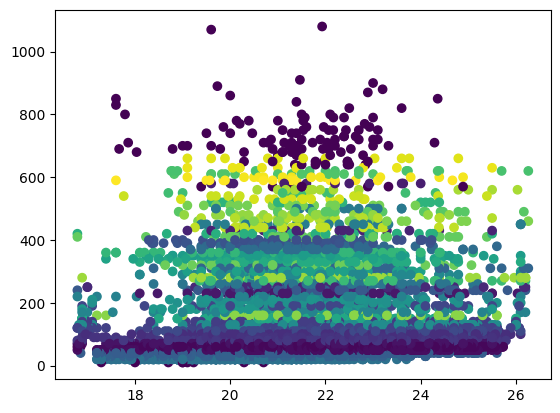

In [24]:
plt.scatter(df['T1'], df['Appliances'], c= df['cluster'])

In [25]:
# Use this step to rather get the derived feature "season" encoded into numerical variable

#encoding the day_of_week column
weekdays_encoded = pd.get_dummies(df.day_of_week)

#run the below line only once as concat keeps adding more columns everytime it's run
data = pd.get_dummies(df, columns=['day_of_week'])
data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,month,weekday,hour,week,week_of_month,cluster,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,1,0,17,2,2,0,False,True,False,False,False,False,False
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,1,0,17,2,2,0,False,True,False,False,False,False,False
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,1,0,17,2,2,1,False,True,False,False,False,False,False
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,1,0,17,2,2,1,False,True,False,False,False,False,False
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,1,0,17,2,2,0,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,5,4,17,21,4,7,True,False,False,False,False,False,False
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,5,4,17,21,4,8,True,False,False,False,False,False,False
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,5,4,17,21,4,41,True,False,False,False,False,False,False
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784,5,4,17,21,4,38,True,False,False,False,False,False,False


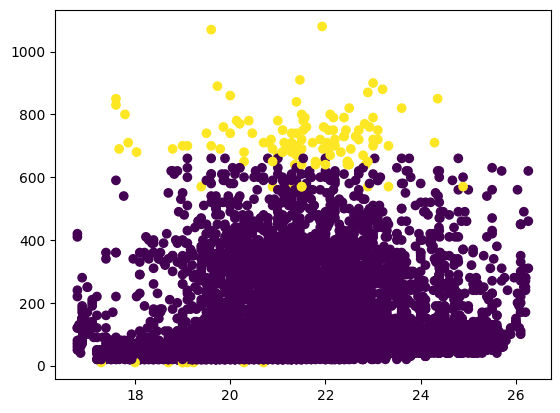

In [26]:
data['outlier_flag'] = data['cluster']==-1
data['outlier_flag'] = data['outlier_flag'].astype(int)
data.head()

#plotting the outliers
plt.scatter(data['T1'], data['Appliances'], c= data['outlier_flag'])

In [27]:
data_outliers_removed = data[data['outlier_flag'] == 0]
data_outliers = data[data['outlier_flag'] == 1]
data_outliers_removed.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,month,weekday,hour,week,week_of_month,cluster,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,outlier_flag
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,1,0,17,2,2,0,False,True,False,False,False,False,False,0
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,1,0,17,2,2,0,False,True,False,False,False,False,False,0
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,1,0,17,2,2,1,False,True,False,False,False,False,False,0
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,1,0,17,2,2,1,False,True,False,False,False,False,False,0
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,1,0,17,2,2,0,False,True,False,False,False,False,False,0


In [28]:
fig = px.scatter(data, x="T1", y="Appliances", color="outlier_flag", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show(renderer="colab")


fig = px.box(data, x="outlier_flag", y="Appliances")
fig.show(renderer="colab")

Text(0, 0.5, 'Price ($)')

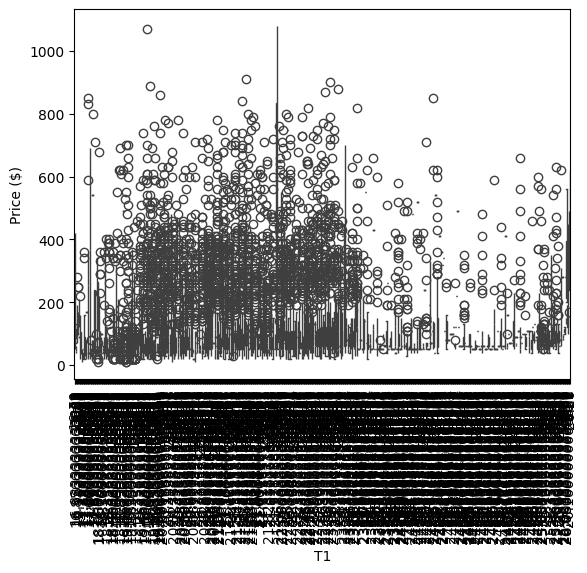

In [29]:
#Outlier detection using IQR
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final


df_outlier_removed=remove_outlier_IQR(df_cluster_input.Appliances)
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=data.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    df_final=df_cluster_input.drop([ind_diff[i]])
    df=df_final

sns.boxplot(y='Appliances', x='T1',data=data)
plt.xticks(rotation=90)
plt.ylabel('Price ($)')

In [30]:
df_outlier_removed

,Appliances
0,60
1,60
2,50
3,50
4,60
...,...
19727,120
19728,110
19729,90
19730,100


In [31]:
X = data.drop(columns=['Appliances','date','cluster','outlier_flag'],axis=1)
y = data['Appliances']

# First, split the data into 60% training and 40% for testing and validation
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.4, random_state=23)

model = DecisionTreeRegressor()
# fit the model
model.fit(X_train_1, y_train_1)
# get importance
importance = model.feature_importances_
# summarize feature importance
impList = zip(X_train_1.columns, importance)
for feature in sorted(impList, key = lambda t: t[1], reverse=True):
    print(feature)

('hour', 0.14227357839624738)
('T3', 0.06526652518976901)
('RH_5', 0.05084245281889277)
('T8', 0.04709542357981418)
('RH_3', 0.043264240268606646)
('RH_2', 0.042226424068394094)
('RH_6', 0.04151634781406652)
('RH_1', 0.039713608354411976)
('RH_8', 0.03821588656276957)
('Press_mm_hg', 0.037695489254554834)
('T4', 0.036556181237767445)
('RH_9', 0.03503389480864087)
('T1', 0.03324953996614982)
('RH_7', 0.03229239162849389)
('T7', 0.028655655029381888)
('lights', 0.0276581782473681)
('RH_out', 0.025193074518699676)
('Visibility', 0.023354166798867145)
('RH_4', 0.022828330507677342)
('rv2', 0.02274192807922607)
('T6', 0.02145094590282268)
('T5', 0.018764242292921063)
('T_out', 0.01814320830192233)
('Windspeed', 0.018014423142408628)
('T2', 0.017577030213524556)
('Tdewpoint', 0.017306423722921956)
('rv1', 0.012678148555095576)
('month', 0.012232349854457971)
('T9', 0.0073762829506174325)
('week', 0.0049033487683981)
('week_of_month', 0.0042275117798106126)
('weekday', 0.004121573585770562)
(

In [ ]:
# Preprocessing
X = data.drop(columns=['Appliances','date'],axis=1)
y = data['Appliances']

# First, split the data into 60% training and 40% for testing and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=23)

# Then, split the testing and validation data equally into 50% each
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=23)


In [ ]:
#Feature selection using RFE with logistic regression
model_logistic = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=500)
sel_rfe_logistic = RFE(estimator=model_logistic, n_features_to_select=20, step=1)

sel_rfe_logistic.fit(X_train, y_train)
selected_features = X_train.columns[sel_rfe_logistic.support_]
selected_features

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'T6',
       'T7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Tdewpoint', 'hour', 'week',
       'cluster'],
      dtype='object')

Text(0.5, 1.0, 'Histogram and KDE of sepal length')

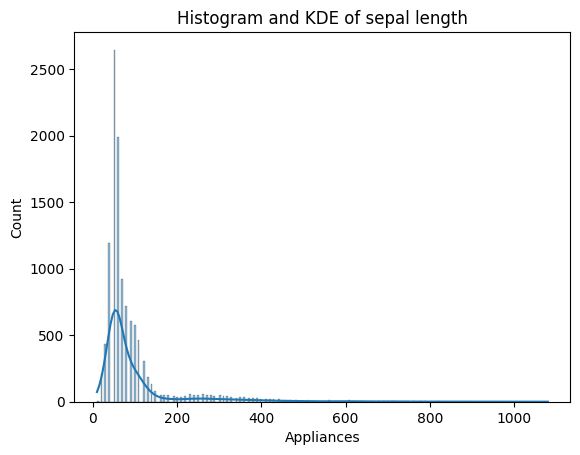

In [ ]:
fig, ax = plt.subplots()
sns.histplot(data=outlier_df, x= 'Appliances', kde=True)
ax.set_title("Histogram and KDE of sepal length")


In [ ]:
skewness = outlier_df['Appliances'].skew()
print(f'Skewness for Appliances = {skewness}')

Skewness for Appliances = 3.4181660638456384


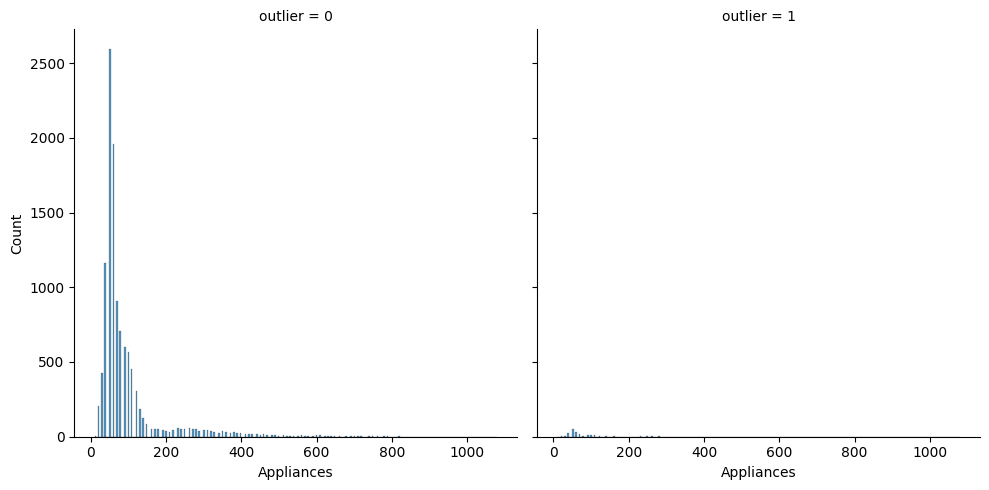

In [ ]:
sns.displot(outlier_df, x="Appliances", col="outlier")